
Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



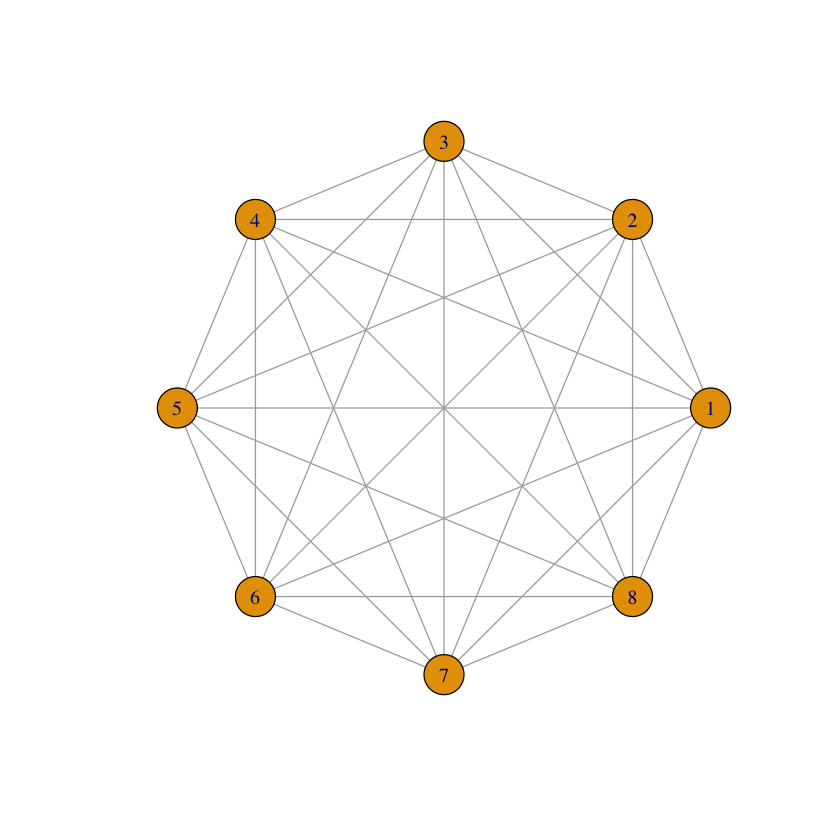

In [2]:
# Network metric analysis
# Let us start with non complex networks
library(igraph)
g <- make_full_graph(8)
plot(g, layout=layout_in_circle)

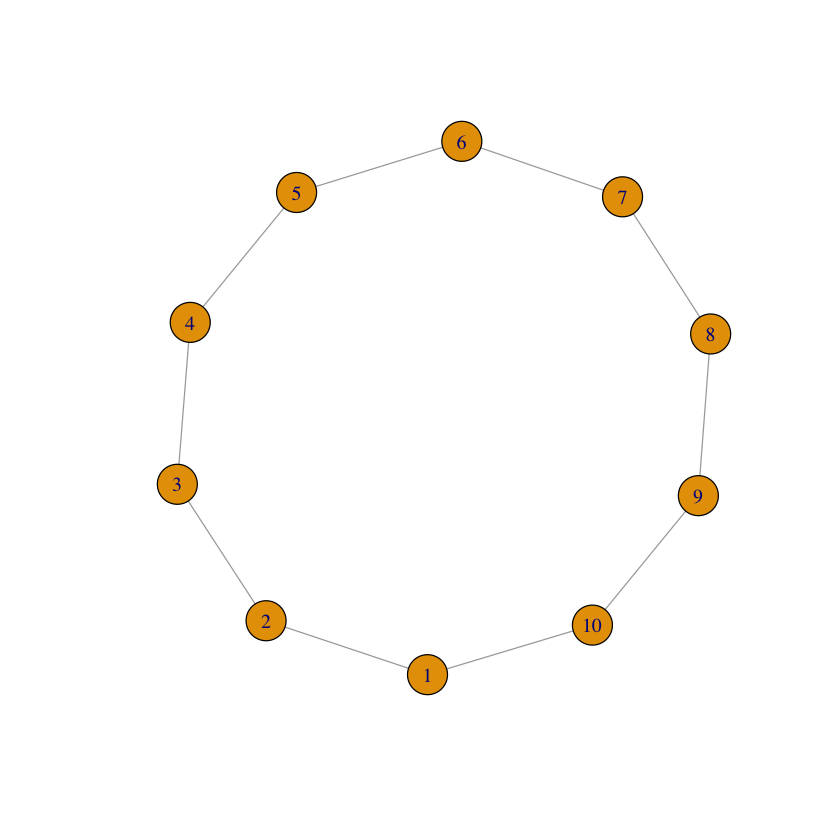

In [25]:
ring <- make_ring(10) # Builds a ring network
plot(ring)

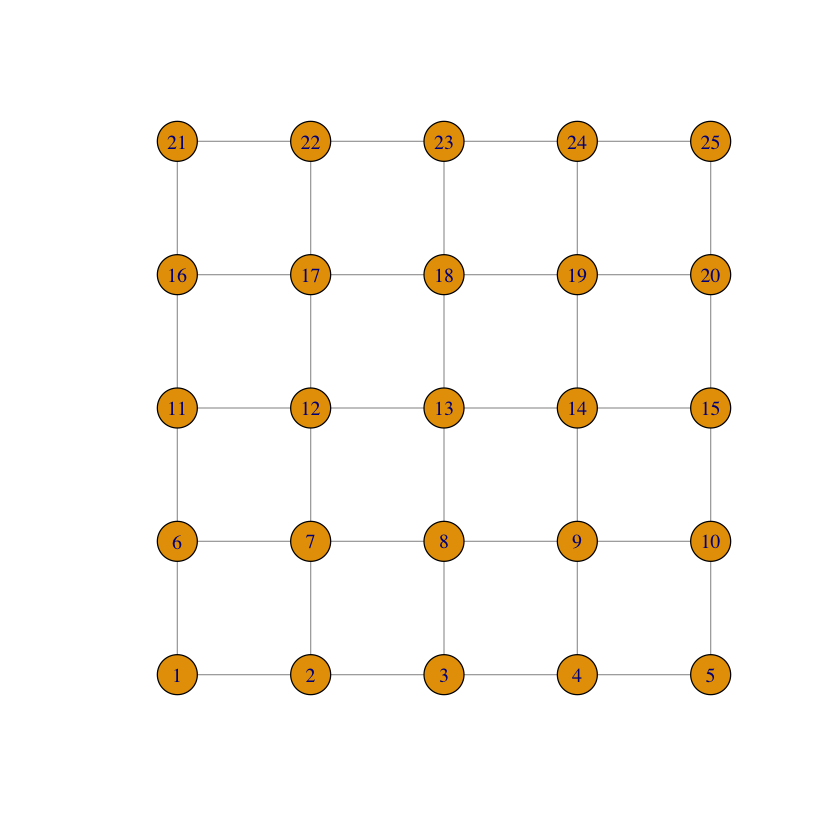

In [26]:
l <- make_lattice(length = 5, dim = 2) # Builds a lattice in 2 dim
plot(l, layout=layout_on_grid)
# Also try the following 
# l <- make_lattice(c(5, 5, 5))
# l <- make_lattice(c(4 ,3))

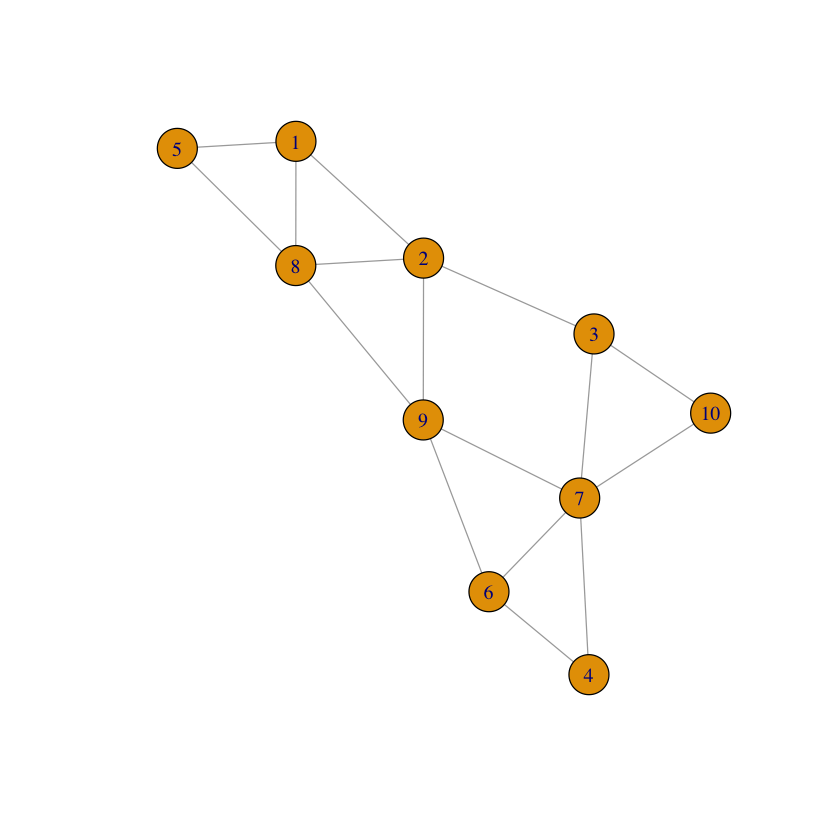

In [14]:
# Generates network using erdos renyi model with n=10^4 nodes 
# and 10^-3 probability of connection between any pair of nodes
# Almost every graph in G(n, 2*ln(n)/n) is connected.
# Go to https://en.wikipedia.org/wiki/Erdős–Rényi_model
# erdos.renyi.game(n,p) 
# n:=nodes, p:=connection probability
# Start by a small graph
er <- erdos.renyi.game(10,0.3)
plot(er, layout=layout_nicely)
# You will have a diffrent result (due to the stochastic nature of the model)

[1] 4.255384

[1] 0.001163538

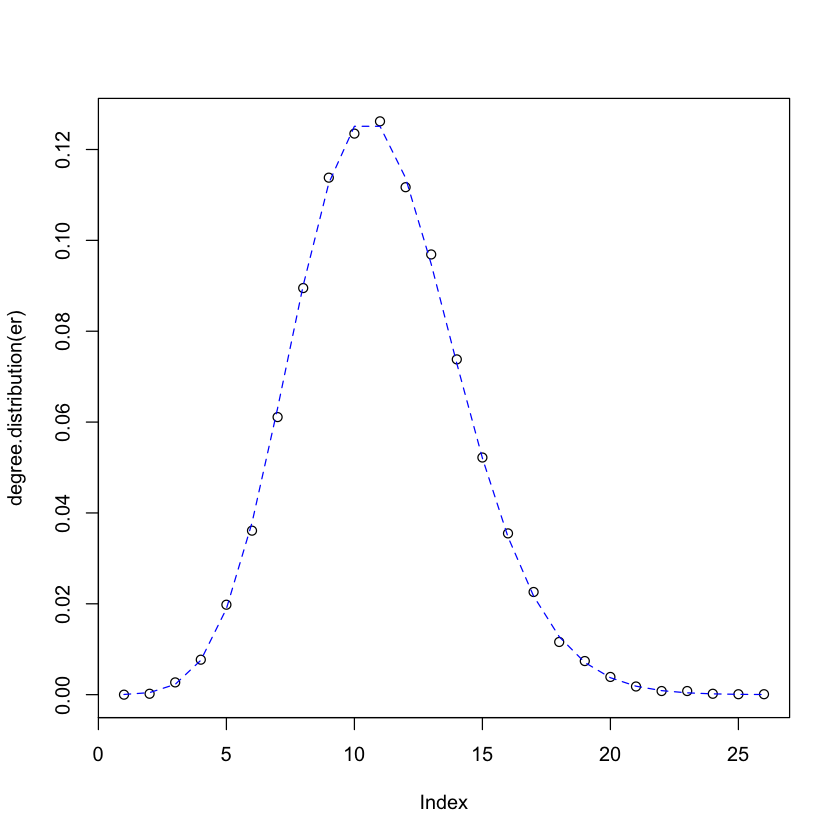

In [9]:
# Now calculate the metrics for a larger graph
er <- erdos.renyi.game(10000,0.001) 
# Now we plot the network degree distribution
# This distribution is Poisson for large n
plot(degree.distribution(er))
# In blue is depicted an rvs X~poiss(lambda=10)
x<-0:25
lines(dpois(x,10), col="blue", lty=2)
# Average path lenght L of the network
average.path.length(er)
# Clustering coefficient C of the network
transitivity(er)

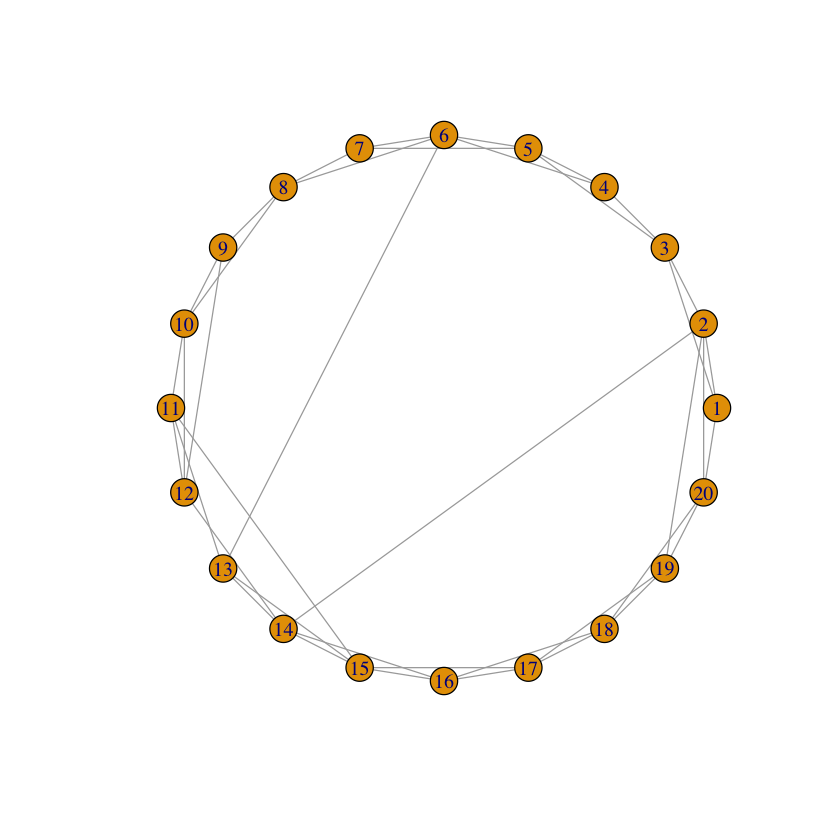

In [5]:
# Small-world network built using watts-strogatz model
# https://en.wikipedia.org/wiki/Watts_and_Strogatz_model
# watts.strogatz.game(dim=1,size=10000,nei=5, p=0.0)
# dim:=dimension 1 is a ring. 
# size:=number of nodes
# nei:=number of neighbors at left and right for nodes in the ring
# p:=omega value (w), probability of random shortcuts
#
# First build a small graph
sw <- watts.strogatz.game(1,20,2,0.1)
plot(sw, layout=layout_in_circle, vertex.size=10)

[1] 4.26016

[1] 0.0009114586

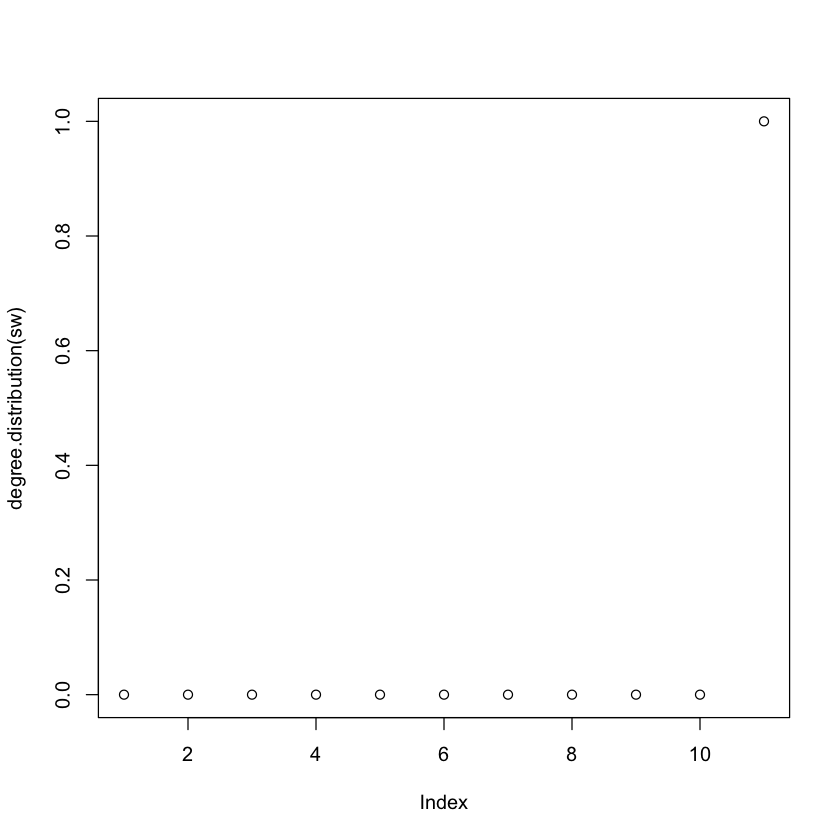

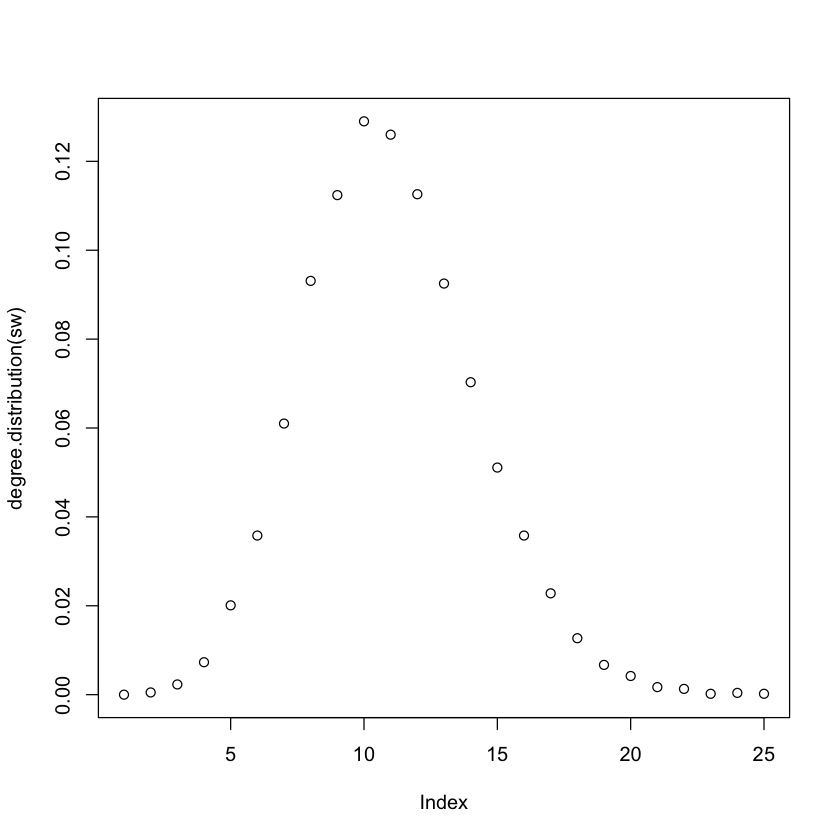

In [6]:
# Measuring the metrics of the small-world network
# Trying a regular ring for w=0
sw <- watts.strogatz.game(1,10000,5,0.0)
# all nodes have the same number of neighbors (same degree)
plot(degree.distribution(sw))

# For w=1 the network is random and equivalent
# to the erdos renyi model gamma=K/N is the same in both cases
# and w=1 means all connections are randomly rearranged
sw <- watts.strogatz.game(1,10000,5,1.0) 
average.path.length(sw) # L
transitivity(sw) # C
plot(degree.distribution(sw))
# Try different values for w in (0,1) and calculate L and C, and interpret the results

In [7]:
# We will explore aditional metrics of the network
# at diffrent scales
sw <- watts.strogatz.game(1,10,2,0.1)

# node metrics
degree(sw)
distances(sw)
closeness(sw)
# closeness is the inverse of the distance
1/rowSums(distances(sw))
betweenness(sw)

# Calculate mesoscopic metrics
distances(sw)
transitivity(sw, type="local")

# Macroscopic metrics
# Go to the slides MD08.pdf and try to calculate
# L and C and check your answer with
average.path.length(sw)
transitivity(sw)

[1] 4 4 5 4 4 3 3 4 4 5

0,1,1,2,2,2,2,2,1,1
1,0,1,1,2,2,3,2,2,1
1,1,0,1,1,1,2,2,2,2
2,1,1,0,1,2,2,2,2,1
2,2,1,1,0,1,1,2,2,2
2,2,1,2,1,0,2,1,2,2
2,3,2,2,1,2,0,1,1,2
2,2,2,2,2,1,1,0,1,1
1,2,2,2,2,2,1,1,0,1
1,1,2,1,2,2,2,1,1,0


[1] 0.07142857 0.06666667 0.07692308 0.07142857 0.07142857 0.06666667
 [7] 0.06250000 0.07142857 0.07142857 0.07692308

[1] 0.07142857 0.06666667 0.07692308 0.07142857 0.07142857 0.06666667
 [7] 0.06250000 0.07142857 0.07142857 0.07692308

[1] 2.0333333 0.6666667 4.5333333 2.0333333 3.4000000 1.5000000 1.5000000
 [8] 3.2000000 2.4000000 4.7333333

0,1,1,2,2,2,2,2,1,1
1,0,1,1,2,2,3,2,2,1
1,1,0,1,1,1,2,2,2,2
2,1,1,0,1,2,2,2,2,1
2,2,1,1,0,1,1,2,2,2
2,2,1,2,1,0,2,1,2,2
2,3,2,2,1,2,0,1,1,2
2,2,2,2,2,1,1,0,1,1
1,2,2,2,2,2,1,1,0,1
1,1,2,1,2,2,2,1,1,0


[1] 0.5000000 0.6666667 0.4000000 0.5000000 0.3333333 0.3333333 0.3333333
 [8] 0.3333333 0.5000000 0.4000000

[1] 1.577778

[1] 0.4354839

 [1] 1 1 2 1 5 5 5 1 2 2 5 1 1 2 3 3 5 1 3 1 3 1 3 4 4 4 3 4 2 3 2 2 3 3

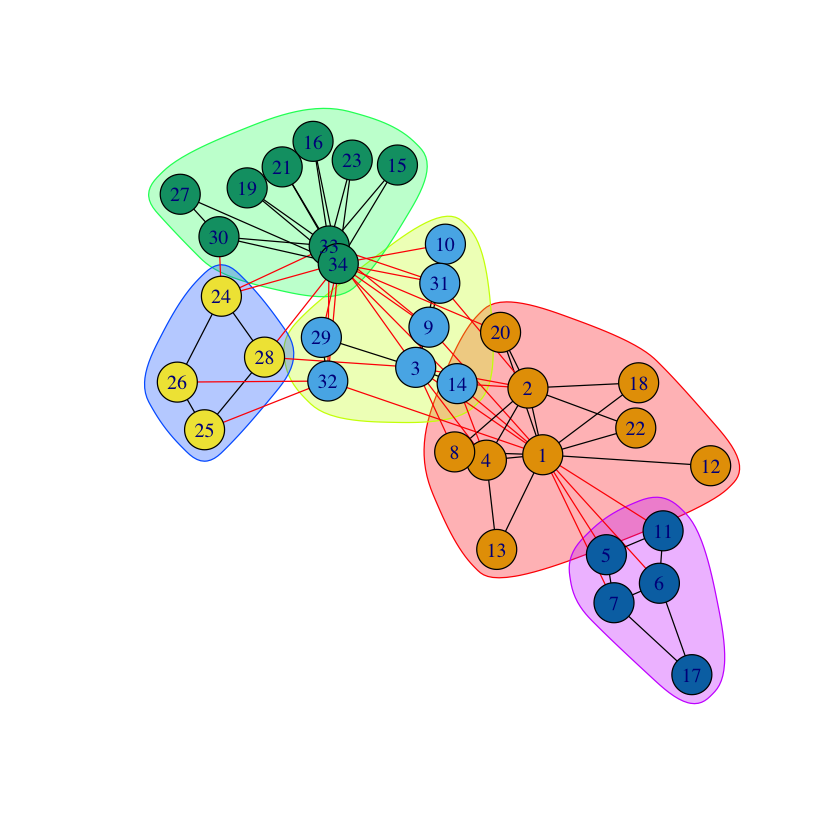

In [15]:
# Comunnity detection
# See this article: https://arxiv.org/pdf/1608.00163.pdf
# Start with a notable graph of the igraph package
# See http://igraph.org/r/doc/make_graph.html
karate <- make_graph("Zachary")
# Build the communities strucure via short random walks
# http://igraph.org/r/doc/cluster_walktrap.html
wc <- cluster_walktrap(karate)
# Here you have a label for each node according
# to the community it belongs to
membership(wc)
# plot the graph with the detected communities
plot(wc, karate)